# Week1&2 Exercises in R

In [3]:
install.packages("xlsx", dependencies = TRUE)

also installing the dependencies 'processx', 'diffobj', 'rematch2', 'brio', 'callr', 'cli', 'desc', 'ellipsis', 'lifecycle', 'pkgload', 'praise', 'ps', 'rlang', 'waldo', 'withr', 'rex', 'rJava', 'xlsxjars', 'rprojroot', 'testthat', 'covr'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
processx   3.5.2  3.7.0              TRUE
diffobj    0.3.4  0.3.5              TRUE
brio       1.1.2  1.1.3              TRUE
callr      3.7.0  3.7.2             FALSE
cli        2.5.0  3.4.0              TRUE
desc       1.3.0  1.4.2             FALSE
lifecycle  1.0.0  1.0.2             FALSE
pkgload    1.2.1  1.3.0             FALSE
ps         1.6.0  1.7.1              TRUE
rlang     0.4.11  1.0.5              TRUE
waldo      0.2.5  0.4.0             FALSE
withr      2.4.2  2.5.0             FALSE
rex        1.2.0  1.2.1             FALSE
rJava      1.0-4  1.0-6              TRUE
rprojroot  2.0.2  2.0.3             FALSE
testthat   3.0.2  3.1.4              TRUE
covr       3.5.1  3.6.1              TRUE

  Binaries will be installed
package 'processx' successfully unpacked and MD5 sums checked
package 'diffobj' successfully unpacked and MD5 sums checked
package 'rematch2

installing the source packages 'callr', 'desc', 'lifecycle', 'pkgload', 'waldo', 'withr', 'rex', 'rprojroot'

Warning message in install.packages("xlsx", dependencies = TRUE):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("xlsx", dependencies = TRUE):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("xlsx", dependencies = TRUE):
"installation of package 'waldo' had non-zero exit status"Warning message in install.packages("xlsx", dependencies = TRUE):
"installation of package 'pkgload' had non-zero exit status"

In [13]:
# Importing necessary packages
library('magrittr')

Data = paste(getwd(), '/obama-approval-ratings.xls', sep = '')
Obama_Ratings = xlsx::read.xlsx(Data, sheetIndex = 1, stringsAsFactors = FALSE)

# Examine data
Obama_Ratings

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3
Economy,38,59,3


In [16]:
library(ggplot2)

#### Barchart - R

In [ ]:
#Plotting bar chart for Issue and Disapproval rate

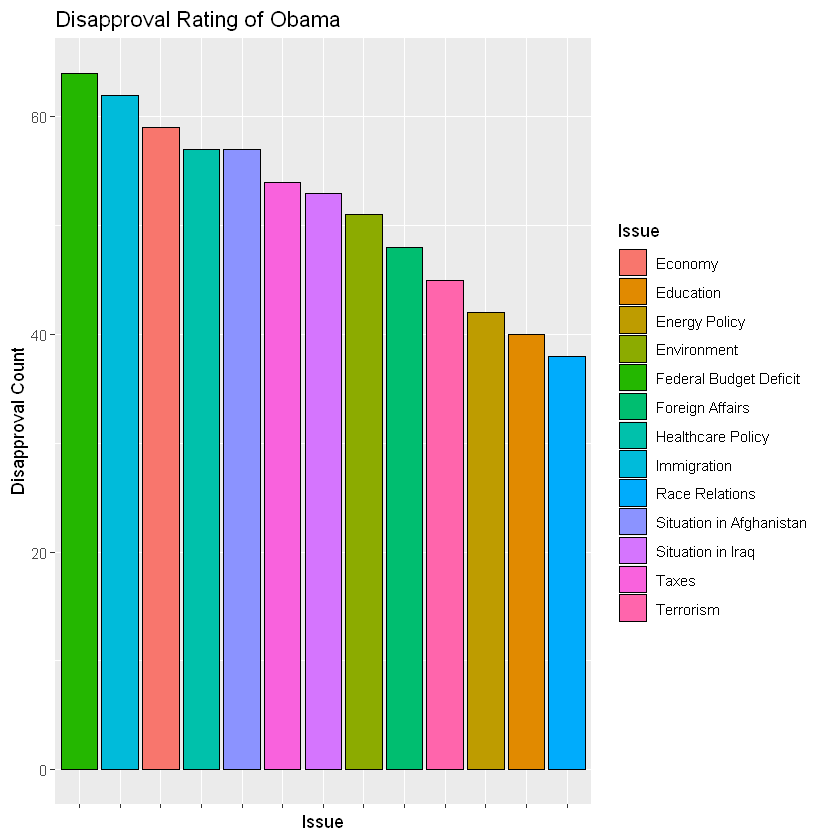

In [17]:
Obama_Ratings %>%
    dplyr::select(Issue, Disapprove) %>%
    dplyr::arrange(-Disapprove) %>%
    dplyr::mutate(SortOrder = factor(Issue, Issue)) %>% 
    ggplot2::ggplot(ggplot2::aes(x=SortOrder, y=Disapprove, fill=Issue)) +
        ggplot2::geom_bar(stat='identity', color='black') + 
        ggplot2::xlab('Issue') + ggplot2::ylab('Disapproval Count') +
        ggplot2::theme(axis.text.x=element_blank()) +
        ggplot2::ggtitle('Disapproval Rating of Obama')

#### Stacked Bar Chart - R

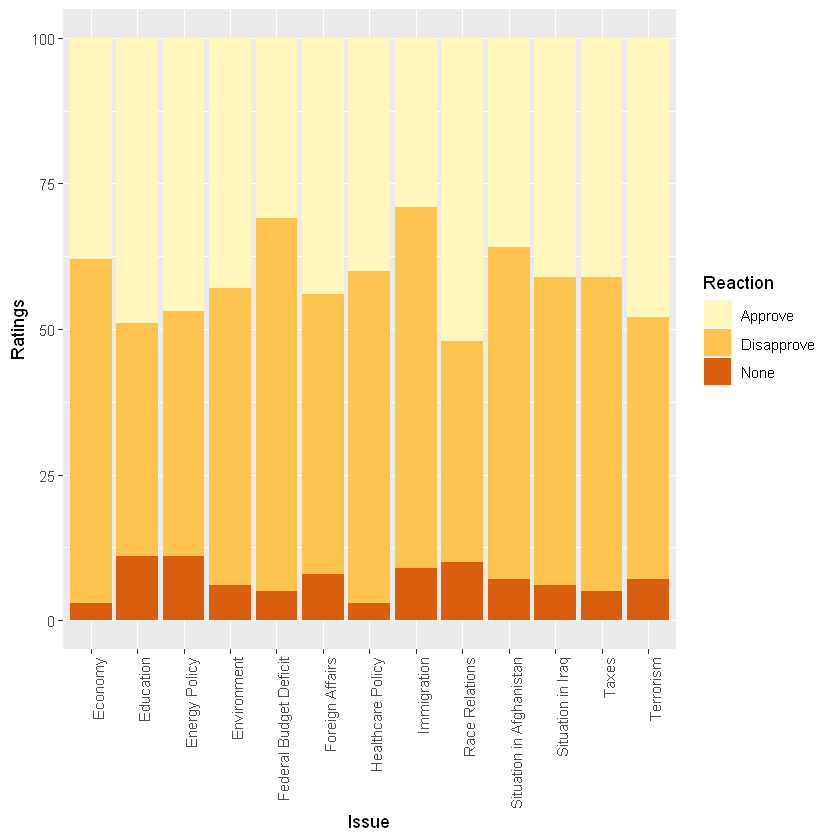

In [20]:
#Plotting stacked bar chart for issue and all the genres of approval
Obama_Ratings_long = Obama_Ratings %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

# Plot stacked
ggplot2::ggplot(data = Obama_Ratings_long, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity') + 
    ggplot2::theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    ggplot2::scale_fill_brewer(palette = 17)

#### Pie Chart - R

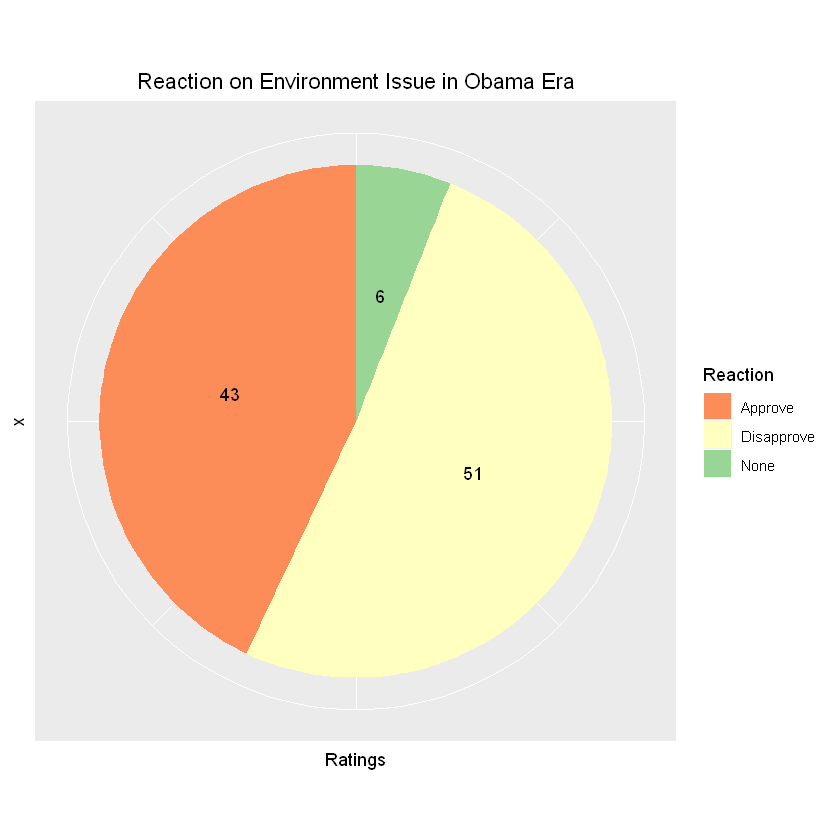

In [21]:
#Plotting pie chart for Environment issue and all genres of ratings
Obama_Ratings_long %>%
    dplyr::filter(Issue=='Environment') %>%
    ggplot2::ggplot(ggplot2::aes(x="", y=Ratings, fill=Reaction))+
        ggplot2::geom_bar(width = 1, stat = 'identity') +
        ggplot2::coord_polar('y', start=0) + 
        ggplot2::geom_text(aes(label = Ratings), position = position_stack(vjust = 0.5)) +
        ggplot2::ggtitle(label = 'Reaction on Environment Issue in Obama Era') +
        ggplot2::scale_fill_brewer(palette='Spectral') + 
        ggplot2::theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust = 0.5))

#### Donut chart - R

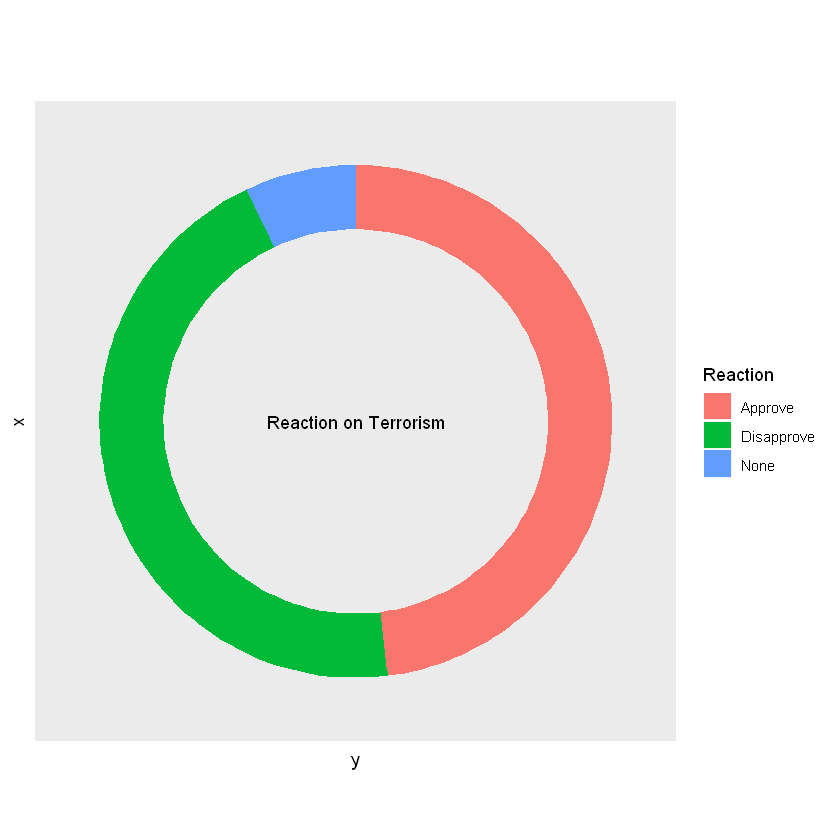

In [22]:
#Plotting Donut chart for Terrorism issue in all genres of rating
Obama_Ratings_long %>%
    dplyr::filter(Issue=='Terrorism') %>%
    dplyr::mutate(ymax=cumsum(Ratings),
                  ymin=c(0,ymax[1:length(ymax)-1])) %>%
    ggplot2::ggplot(ggplot2::aes(fill=Reaction, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
         ggplot2::geom_rect() +
         ggplot2::coord_polar(theta='y') +
         ggplot2::xlim(c(0, 4)) +
         ggplot2::theme(panel.grid=element_blank()) +
         ggplot2::theme(axis.text=element_blank()) +
         ggplot2::theme(axis.ticks=element_blank()) +
         ggplot2::annotate('text', x = 0, y = 0, label = 'Reaction on Terrorism') +
         ggplot2::labs(title='')